In [153]:
import pandas as pd 
import numpy as np 
import tensorflow as tf
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

In [35]:
# untar=True mean to unzip the file
url="https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip"
dir=tf.keras.utils.get_file("data",origin=url,cache_dir='.',extract=True)

68606236/68606236 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


In [36]:
dir

'.\\datasets\\data'

In [40]:
#pathlinbs useful for reading a s numpy array
#path is as windows path object
import pathlib
dir=pathlib.Path(dir).parent
dir

WindowsPath('datasets')

In [78]:
a=list(dir.rglob('*/*jpg'))
a[0]

WindowsPath('C:/Users/godof/OneDrive/Desktop/summer/dl lab/cnn(week4)/datasets/cats_and_dogs_filtered/train/cats/cat.0.jpg')

In [73]:
import PIL

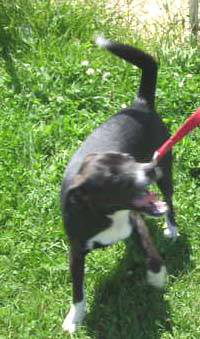

In [77]:
PIL.Image.open(str(a[2500]))

In [112]:
animal_dict={
    'cat':list(dir.rglob('cats/*')),
    'dog':list(dir.rglob('dogs/*'))
}

In [113]:
len(list(dir.rglob('dogs/*')))

1500

In [114]:
animal_class={
    'dog':0,
    'cat':1
}

In [115]:
import cv2

In [116]:
# open cv may not accpet window path so we convert it to string 
img=cv2.imread(str(animal_dict["cat"][0]))

In [117]:
# 3d shape 
img.shape
#3 value because of rgb channel 

(374, 500, 3)

In [118]:
# images in folder are of different dimensions 
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [126]:
x,y=[], []
for name,image in animal_dict.items() :
    for i in image :
        img=cv2.imread(str(i))
        img=cv2.resize(img,(180,180))
        x.append(img)
        y.append(animal_class[name])

In [134]:
#now we just convert it to numpy array 
x=np.array(x)
y=np.array(y)

In [136]:
x.shape

(3000, 180, 180, 3)

In [142]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [145]:
x_train=x_train/255
x_test=x_test/255

In [147]:
from tensorflow.keras.models import Sequential

In [167]:

cnn=Sequential([
    Conv2D(32,3,padding='same',activation='relu'),
    MaxPooling2D(),
    Conv2D(64,3,padding='same',activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(128,activation='relu'),
    Dense(2,activation='softmax'),
])
cnn.compile(optimizer='adam',metrics=['accuracy'],loss='sparse_categorical_crossentropy')

In [168]:
history=cnn.fit(x_train,y_train,epochs=8)

Epoch 1/8
75/75 ━━━━━━━━━━━━━━━━━━━━ 45s 558ms/step - accuracy: 0.4876 - loss: 0.6950
Epoch 2/8
75/75 ━━━━━━━━━━━━━━━━━━━━ 42s 556ms/step - accuracy: 0.4804 - loss: 0.6934
Epoch 3/8
75/75 ━━━━━━━━━━━━━━━━━━━━ 42s 566ms/step - accuracy: 0.5012 - loss: 0.6932
Epoch 4/8
75/75 ━━━━━━━━━━━━━━━━━━━━ 40s 534ms/step - accuracy: 0.5269 - loss: 0.6927
Epoch 5/8
75/75 ━━━━━━━━━━━━━━━━━━━━ 46s 609ms/step - accuracy: 0.5061 - loss: 0.6931
Epoch 6/8
75/75 ━━━━━━━━━━━━━━━━━━━━ 44s 580ms/step - accuracy: 0.5025 - loss: 0.6932
Epoch 7/8
75/75 ━━━━━━━━━━━━━━━━━━━━ 39s 514ms/step - accuracy: 0.5280 - loss: 0.6926
Epoch 8/8
75/75 ━━━━━━━━━━━━━━━━━━━━ 39s 515ms/step - accuracy: 0.5099 - loss: 0.6930


In [162]:
x_train.shape

(2400, 180, 180, 3)

In [169]:
cnn.evaluate(x_test,y_test)

19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 101ms/step - accuracy: 0.4733 - loss: 2.3851


[2.39589524269104, 0.47833332419395447]

In [170]:
prediction=cnn.predict(x_test)

19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 106ms/step


In [194]:
np.argmax(prediction[99])

0

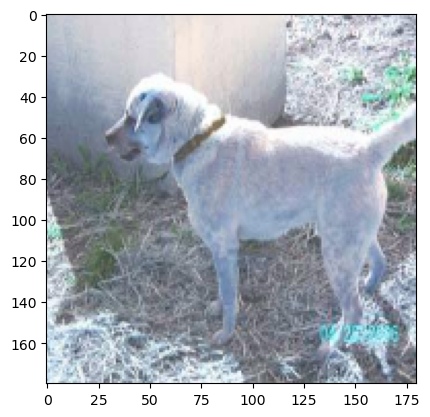

In [196]:
import matplotlib.pyplot as plt 
plt.imshow(x_test[126])

# Important points added as not dont forget to read 

## data augmentation

In [216]:
from tensorflow import keras 
# this creates a function data_augmentation which returns a tensor 
data_augmentation = keras.Sequential(
  [
    keras.layers.RandomZoom(0.9),
  ]
)
#eg
data_augmentation(x_test)[0]

<tf.Tensor: shape=(180, 180, 3), dtype=float32, numpy=
array([[[0.05568485, 0.07888274, 0.10644423],
        [0.07290435, 0.09610224, 0.12366374],
        [0.09093723, 0.11011229, 0.14076488],
        ...,
        [0.6637532 , 0.88829476, 0.9583046 ],
        [0.65775776, 0.8728654 , 0.9452762 ],
        [0.63769674, 0.83301735, 0.90785867]],

       [[0.05589032, 0.07179649, 0.10178855],
        [0.07762922, 0.09353538, 0.12352744],
        [0.09497474, 0.11076315, 0.14254463],
        ...,
        [0.6289015 , 0.8356458 , 0.91602874],
        [0.6184598 , 0.8049836 , 0.8871167 ],
        [0.5848406 , 0.744045  , 0.82860863]],

       [[0.06332806, 0.07509276, 0.10646532],
        [0.08698297, 0.09874768, 0.13012023],
        [0.10553675, 0.11940163, 0.15238664],
        ...,
        [0.5912553 , 0.7823598 , 0.87109035],
        [0.5849421 , 0.7499808 , 0.8379466 ],
        [0.5553374 , 0.68877864, 0.77787334]],

       ...,

       [[0.40378147, 0.43123245, 0.49005598],
        [0.40

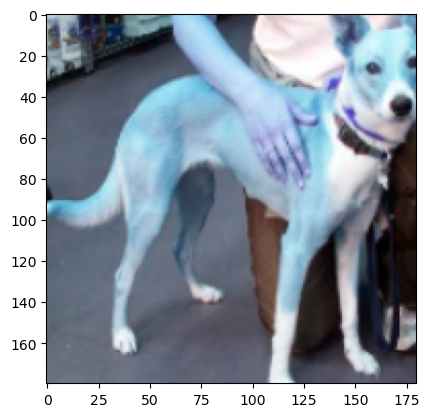

In [217]:
#data_augment must take the complete x_test and the first image is portrayed here
plt.imshow(data_augmentation(x_test)[0])

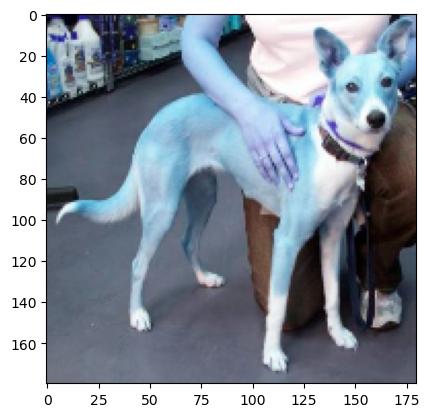

In [215]:
plt.imshow(x_test[0])

In [228]:
#similarly we can do various kinds of data augmentations
data_augmentation = keras.Sequential(
  [
    keras.layers.RandomFlip("horizontal", input_shape=(180, 180,3)),
    keras.layers.RandomRotation(0.5),
    keras.layers.RandomZoom(0.5),
  ]
)

C:\Users\godof\anaconda3\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:18: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [229]:

cnn=Sequential([
    data_augmentation,
    Conv2D(32,3,padding='same',activation='relu'),
    MaxPooling2D(),
    Conv2D(64,3,padding='same',activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(128,activation='relu'),
    Dense(2,activation='softmax'),
])
cnn.compile(optimizer='adam',metrics=['accuracy'],loss='sparse_categorical_crossentropy')

In [230]:
history=cnn.fit(x_train,y_train,epochs=8)

Epoch 1/8
75/75 ━━━━━━━━━━━━━━━━━━━━ 50s 624ms/step - accuracy: 0.4876 - loss: 0.6941
Epoch 2/8
75/75 ━━━━━━━━━━━━━━━━━━━━ 42s 564ms/step - accuracy: 0.5157 - loss: 0.6929
Epoch 3/8
75/75 ━━━━━━━━━━━━━━━━━━━━ 47s 625ms/step - accuracy: 0.5041 - loss: 0.6932
Epoch 4/8
75/75 ━━━━━━━━━━━━━━━━━━━━ 53s 702ms/step - accuracy: 0.4855 - loss: 0.6933
Epoch 5/8
75/75 ━━━━━━━━━━━━━━━━━━━━ 57s 762ms/step - accuracy: 0.5000 - loss: 0.6932
Epoch 6/8
75/75 ━━━━━━━━━━━━━━━━━━━━ 52s 693ms/step - accuracy: 0.5163 - loss: 0.6928
Epoch 7/8
75/75 ━━━━━━━━━━━━━━━━━━━━ 43s 568ms/step - accuracy: 0.5049 - loss: 0.6931
Epoch 8/8
75/75 ━━━━━━━━━━━━━━━━━━━━ 44s 585ms/step - accuracy: 0.4948 - loss: 0.6933


In [231]:
cnn.evaluate(x_test,y_test)

19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 85ms/step - accuracy: 0.5267 - loss: 2.0200


[1.9858959913253784, 0.5216666460037231]